<h1 style="text-align: center;">Deep Learning<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("drive/MyDrive/Colab_Files/data/Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

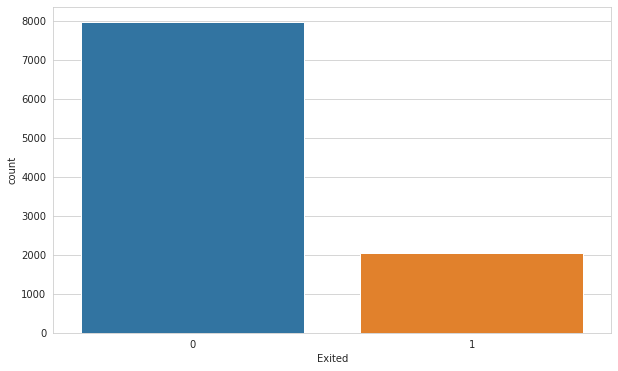

In [ ]:
sns.countplot(df["Exited"])

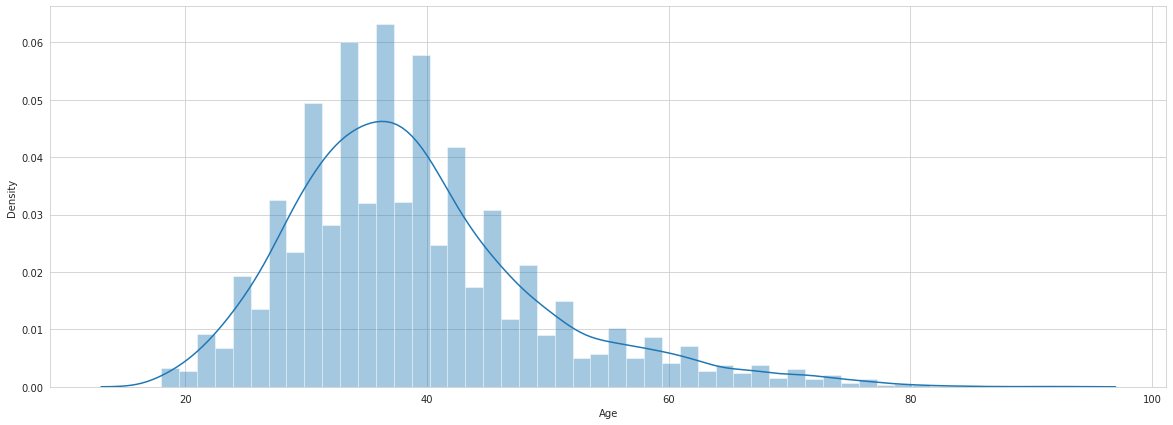

In [ ]:
plt.figure(figsize=(20,7))
sns.distplot(df.Age)

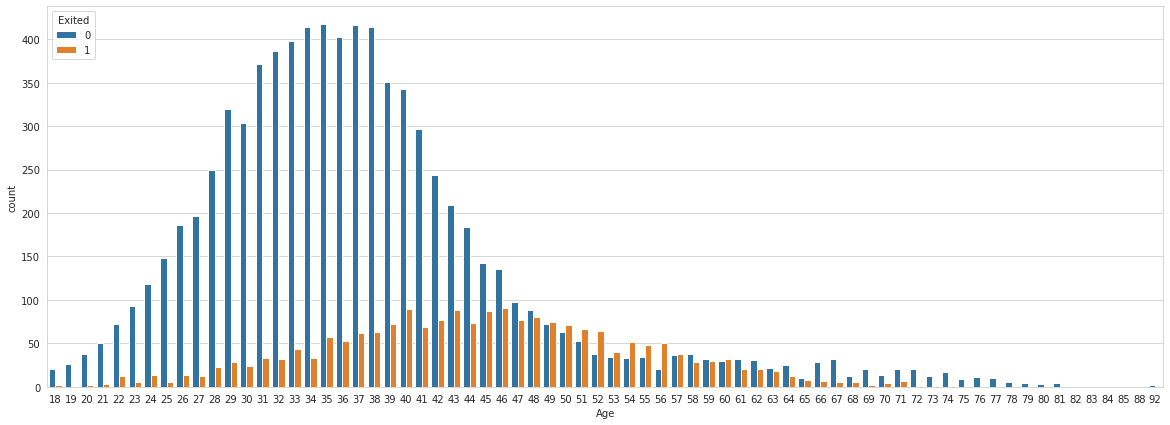

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(df.Age, hue=df.Exited)

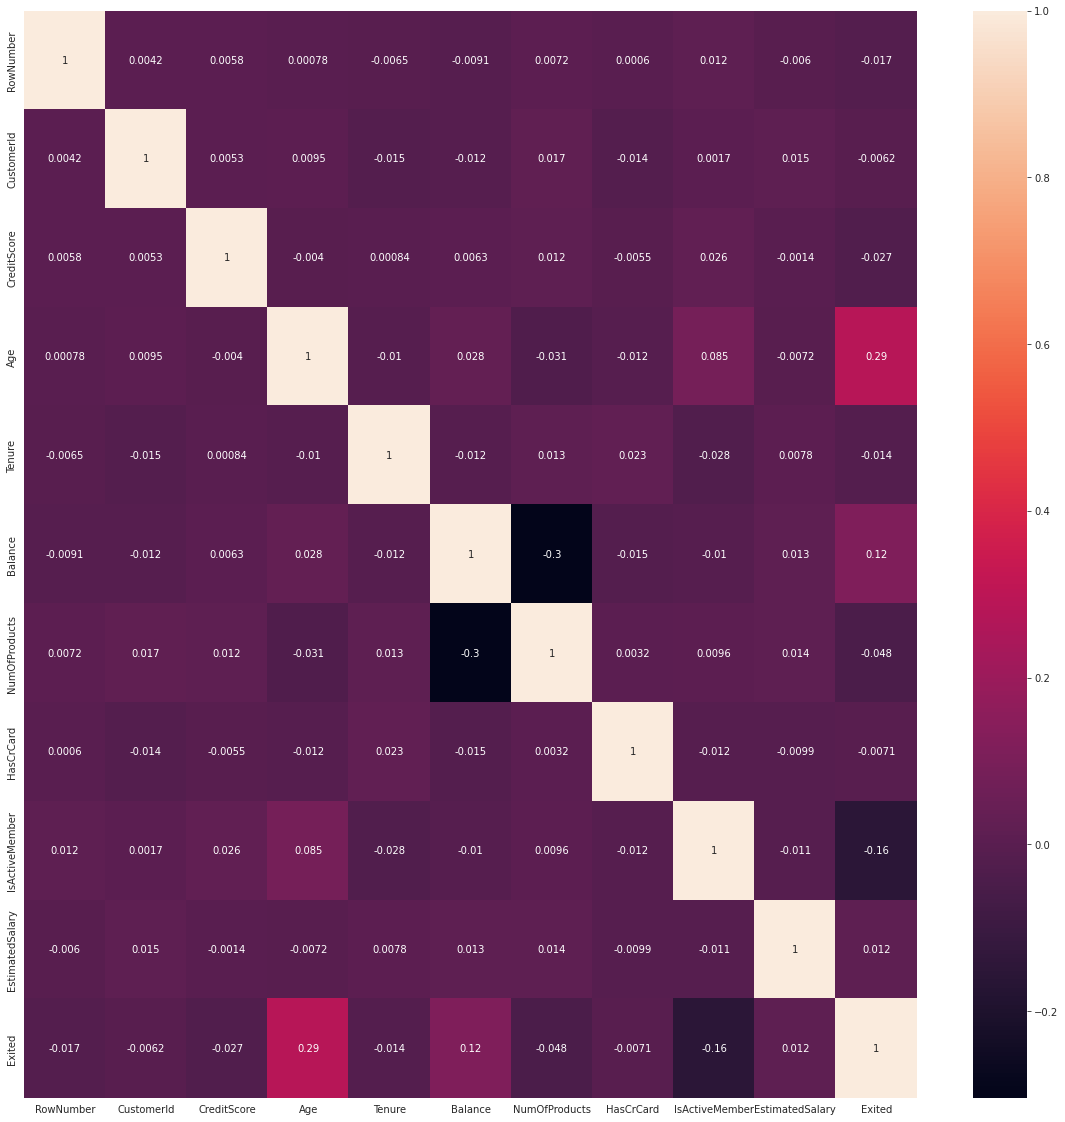

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [ ]:
drop_list = ["RowNumber", "CustomerId", "Surname"]

In [ ]:
df=df.drop(drop_list, axis=1)

In [ ]:
df.shape

(10000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.duplicated().sum() # varsa sil

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['Geography', 'Gender']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)

In [ ]:
transformed_df.head()

,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.000,0.000,0.000,1.000,0.000,619.000,42.000,2.000,0.000,1.000,1.000,1.000,101348.880,1.000
1,0.000,0.000,1.000,1.000,0.000,608.000,41.000,1.000,83807.860,1.000,0.000,1.000,112542.580,0.000
2,1.000,0.000,0.000,1.000,0.000,502.000,42.000,8.000,159660.800,3.000,1.000,0.000,113931.570,1.000
3,1.000,0.000,0.000,1.000,0.000,699.000,39.000,1.000,0.000,2.000,0.000,0.000,93826.630,0.000
4,0.000,0.000,1.000,1.000,0.000,850.000,43.000,2.000,125510.820,1.000,1.000,1.000,79084.100,0.000


# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = transformed_df.drop('Exited', axis=1)
y = transformed_df['Exited']

In [ ]:
seed = 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed) #stratify kullanmak faydalı

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [4]:
%pip install daal==2021.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 MB 1.4 MB/s eta 0:00:0000:0100:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tbb
    Found existing installation: TBB 0.2
ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install numba==0.54.1

  Using cached numba-0.54.1-cp39-cp39-macosx_10_14_x86_64.whl (2.3 MB)
  Using cached llvmlite-0.37.0-cp39-cp39-macosx_10_9_x86_64.whl (19.1 MB)
  Using cached numpy-1.20.3-cp39-cp39-macosx_10_9_x86_64.whl (16.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0
    Uninstalling llvmlite-0.38.0:
      Successfully uninstalled llvmlite-0.38.0
  Attempting uninstall: numba
    Found existing installation: numba 0.55.1
    Uninstalling numba-0.55.1:
      Successfully uninstalled numba-0.55.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2

In [7]:
%pip install numpy==1.20.3

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install scikit-learn==1.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 1.1 MB/s eta 0:00:0000:0100:010m
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyclustertend 1.7.1 requires scikit-learn<0.25.0,>=0.24.0, but you have scikit-learn 1.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


  Using cached numpy-1.23.3-cp39-cp39-macosx_10_9_x86_64.whl (18.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
pyclustertend 1.7.1 requires numba<0.55.0,>=0.54.1, but you have numba 0.55.1 which is incompatible.
pyclustertend 1.7.1 requires numpy==1.20.3, but you have numpy 1.23.3 which is incompatible.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.
tensorflow 2.9.1 requires flatbuffers<2,>=1.12, but you have flatbuffers 2.0 which is incompatible.
tensorflow 2.9.1 requires gast<=0.4.0,>=0.2.1, but you have gast 0.5.3 which is incompatible.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
X_train.shape

(9000, 13)

In [ ]:
X_test.shape

(1000, 13)

## without class_weigth

### Create The Model

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(2, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

0

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
254/254 [==============================] - 2s 4ms/step - loss: 0.6168 - recall: 0.0278 - val_loss: 0.4811 - val_recall: 0.0000e+00
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4738 - recall: 0.0000e+00 - val_loss: 0.4523 - val_recall: 0.0000e+00
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4588 - recall: 0.0000e+00 - val_loss: 0.4372 - val_recall: 0.0000e+00
Epoch 4/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4486 - recall: 0.0000e+00 - val_loss: 0.4294 - val_recall: 0.0000e+00
Epoch 5/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4406 - recall: 0.0000e+00 - val_loss: 0.4181 - val_recall: 0.0000e+00
Epoch 6/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4336 - recall: 0.0000e+00 - val_loss: 0.4124 - val_recall: 0.0000e+00
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4291 - recall: 0.0000e+00 - val_loss: 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.617,0.028,0.481,0.000
1,0.474,0.000,0.452,0.000
2,0.459,0.000,0.437,0.000
3,0.449,0.000,0.429,0.000
4,0.441,0.000,0.418,0.000


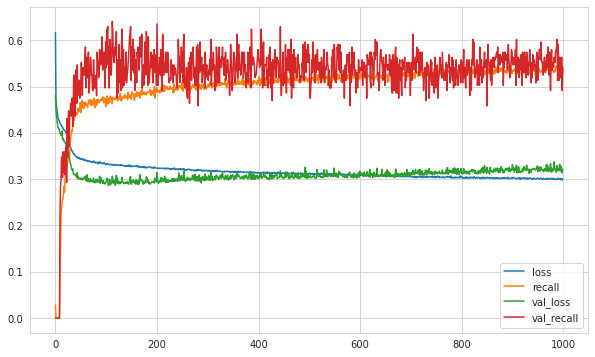

In [ ]:
loss_df.plot(); 

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.3612324893474579, 0.4852941036224365]

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3612324893474579
accuracy :  0.4852941036224365


In [ ]:
y_pred = model.predict(X_test) > 0.5  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[758  38]
 [105  99]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       796
         1.0       0.72      0.49      0.58       204

    accuracy                           0.86      1000
   macro avg       0.80      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



In [ ]:
#imbalanced datada precision-recall grafiği çizdirmeliyiz (burada)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

### Create The Model

In [ ]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(2, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 8ms/step - loss: 0.6955 - recall: 0.3438 - val_loss: 0.6928 - val_recall: 0.0055
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6935 - recall: 0.0042 - val_loss: 0.6930 - val_recall: 0.0055
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6935 - recall: 0.6628 - val_loss: 0.6933 - val_recall: 1.0000
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6935 - recall: 0.9782 - val_loss: 0.6936 - val_recall: 1.0000
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6934 - recall: 0.0854 - val_loss: 0.6934 - val_recall: 0.0939
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6925 - recall: 0.6235 - val_loss: 0.6984 - val_recall: 0.5414
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6701 - recall: 0.6441 - val_loss: 0.6313 - val_recall: 0.6133
Epoch 8/300
64/64 [======================

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                280       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 4)                 44        
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.696,0.344,0.693,0.006
1,0.694,0.004,0.693,0.006
2,0.694,0.663,0.693,1.000
3,0.694,0.978,0.694,1.000
4,0.693,0.085,0.693,0.094


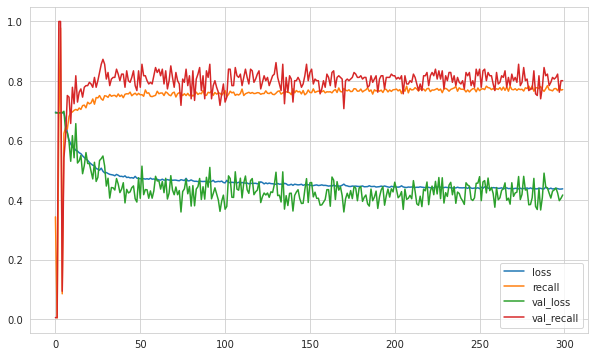

In [ ]:
loss_df.plot();

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.4498097598552704, 0.779411792755127]

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4498097598552704
accuracy :  0.779411792755127


In [ ]:
y_pred = model.predict(X_test) > 0.5  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[625 171]
 [ 45 159]]
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85       796
         1.0       0.48      0.78      0.60       204

    accuracy                           0.78      1000
   macro avg       0.71      0.78      0.72      1000
weighted avg       0.84      0.78      0.80      1000



In [ ]:
# burada da precision - recall grafiğini çizeceğiz

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(2, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 2s 13ms/step - loss: 0.6955 - recall: 0.3438 - val_loss: 0.6928 - val_recall: 0.0055
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6935 - recall: 0.0042 - val_loss: 0.6930 - val_recall: 0.0055
Epoch 3/300
64/64 [==============================] - 0s 6ms/step - loss: 0.6935 - recall: 0.6628 - val_loss: 0.6933 - val_recall: 1.0000
Epoch 4/300
64/64 [==============================] - 0s 6ms/step - loss: 0.6935 - recall: 0.9782 - val_loss: 0.6936 - val_recall: 1.0000
Epoch 5/300
64/64 [==============================] - 0s 6ms/step - loss: 0.6934 - recall: 0.0854 - val_loss: 0.6934 - val_recall: 0.0939
Epoch 6/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6925 - recall: 0.6235 - val_loss: 0.6984 - val_recall: 0.5414
Epoch 7/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6701 - recall: 0.6441 - val_loss: 0.6313 - val_recall: 0.6133
Epoch 8/300
64/64 [=====================

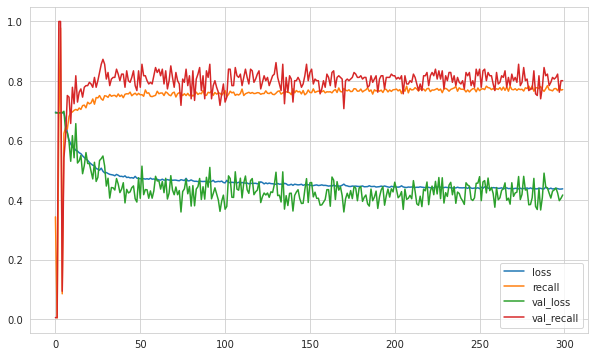

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4498097598552704
accuracy :  0.779411792755127


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#

[[625 171]
 [ 45 159]]
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85       796
         1.0       0.48      0.78      0.60       204

    accuracy                           0.78      1000
   macro avg       0.71      0.78      0.72      1000
weighted avg       0.84      0.78      0.80      1000



### Add Dropout Layer

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.00001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 2s 8ms/step - loss: 0.7142 - recall: 0.4824 - val_loss: 0.7443 - val_recall: 0.6409
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.7163 - recall: 0.4619 - val_loss: 0.7416 - val_recall: 0.6188
Epoch 3/300
64/64 [==============================] - 0s 4ms/step - loss: 0.7109 - recall: 0.4631 - val_loss: 0.7393 - val_recall: 0.6077
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.7137 - recall: 0.4370 - val_loss: 0.7368 - val_recall: 0.5635
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.7111 - recall: 0.4492 - val_loss: 0.7342 - val_recall: 0.5249
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.7109 - recall: 0.4431 - val_loss: 0.7320 - val_recall: 0.5028
Epoch 7/300
64/64 [==============================] - 0s 4ms/step - loss: 0.7103 - recall: 0.4455 - val_loss: 0.7300 - val_recall: 0.4972
Epoch 8/300
64/64 [======================

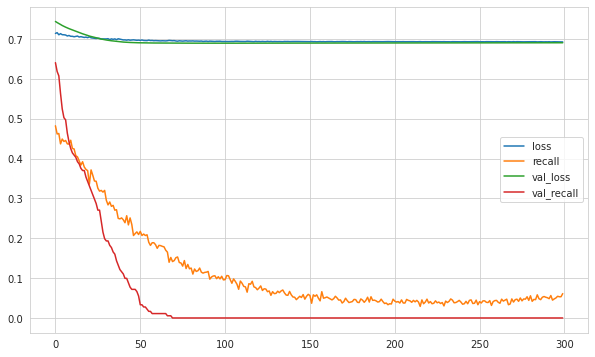

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.6909152865409851
accuracy :  0.0


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#

[[796   0]
 [204   0]]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       796
         1.0       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



### Add Early Stop

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.00001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

#### Monitor the "val_loss" as metric

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 2s 8ms/step - loss: 0.7142 - recall: 0.4824 - val_loss: 0.7443 - val_recall: 0.6409
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.7163 - recall: 0.4619 - val_loss: 0.7416 - val_recall: 0.6188
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.7109 - recall: 0.4631 - val_loss: 0.7393 - val_recall: 0.6077
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.7137 - recall: 0.4370 - val_loss: 0.7368 - val_recall: 0.5635
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.7111 - recall: 0.4492 - val_loss: 0.7342 - val_recall: 0.5249
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.7109 - recall: 0.4431 - val_loss: 0.7320 - val_recall: 0.5028
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.7103 - recall: 0.4455 - val_loss: 0.7300 - val_recall: 0.4972
Epoch 8/300
64/64 [======================

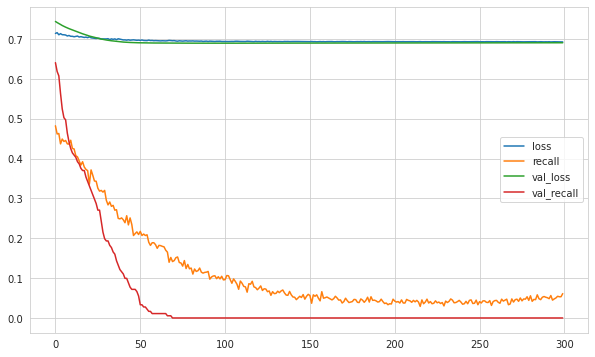

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.6909152865409851
accuracy :  0.0


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#

[[796   0]
 [204   0]]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       796
         1.0       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



#### Monitor the "val_recall" as metric

In [ ]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights,
          callbacks = [early_stop])

Epoch 1/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6934 - recall: 0.0508 - val_loss: 0.6909 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6936 - recall: 0.0418 - val_loss: 0.6909 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6933 - recall: 0.0539 - val_loss: 0.6909 - val_recall: 0.0000e+00
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6931 - recall: 0.0666 - val_loss: 0.6909 - val_recall: 0.0000e+00
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6936 - recall: 0.0460 - val_loss: 0.6909 - val_recall: 0.0000e+00
Epoch 6/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6930 - recall: 0.0587 - val_loss: 0.6909 - val_recall: 0.0000e+00
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6934 - recall: 0.0527 - val_loss: 0.6909 - val_recall: 0.0000e+00
Epoch 8/300
6

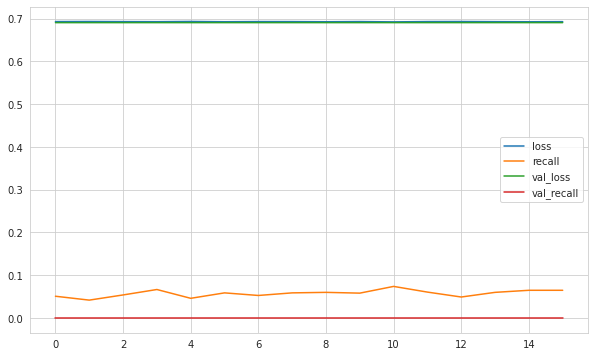

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.6909298300743103
accuracy :  0.0


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#

[[796   0]
 [204   0]]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       796
         1.0       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



## GridSearchCV

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam 



In [ ]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 20, activation = 'relu'))
    classifier.add(Dense(units = 10, activation = 'relu'))
    classifier.add(Dense(units = 4, activation = 'relu'))
    classifier.add(Dense(units = 2, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200) # buradaki keras ve scikitlearn birlikteligine wrapper deniyor
parameters = {'batch_size': [128, 264],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}
grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])


Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
64/64 [==============================] - 2s 8ms/step - loss: 0.5468 - recall: 0.0133 - val_loss: 0.4589 - val_recall: 0.0000e+00
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4622 - recall: 0.0000e+00 - val_loss: 0.4394 - val_recall: 0.0000e+00
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4491 - recall: 0.0000e+00 - val_loss: 0.4221 - val_recall: 0.0000e+00
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4386 - recall: 0.0000e+00 - val_loss: 0.4291 - val_recall: 0.0000e+00
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4334 - recall: 0.0000e+00 - val_loss: 0.4192 - val_recall: 0.0000e+00
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4305 - recall: 0.0999 - val_loss: 0.4078 - val_recall: 0.2210
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4254

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f42a7a1cb10>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 264],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [85]:
grid_model.best_score_

0.46110381573148596

In [86]:
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.005,
 'optimizer': keras.optimizer_v2.rmsprop.RMSprop}

In [87]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
9,0.461,0.069,1,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
16,0.454,0.046,2,"{'batch_size': 264, 'learn_rate': 0.003, 'opti..."
0,0.453,0.051,3,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
20,0.452,0.044,4,"{'batch_size': 264, 'learn_rate': 0.005, 'opti..."
7,0.452,0.053,5,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
5,0.450,0.038,6,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
17,0.449,0.059,7,"{'batch_size': 264, 'learn_rate': 0.003, 'opti..."
4,0.447,0.038,8,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
1,0.446,0.053,9,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
21,0.444,0.054,10,"{'batch_size': 264, 'learn_rate': 0.005, 'opti..."


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [88]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[768  28]
 [108  96]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       796
         1.0       0.77      0.47      0.59       204

    accuracy                           0.86      1000
   macro avg       0.83      0.72      0.75      1000
weighted avg       0.86      0.86      0.85      1000



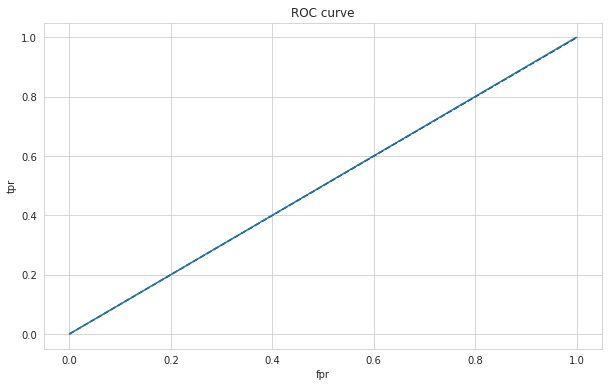

In [89]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

# Final Model and Model Deployment

In [90]:
import pickle
pickle.dump(scaler, open("model_bankingchurn", 'wb'))

In [91]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(2, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [97]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 75, verbose = 1, class_weight=class_weights)

Epoch 1/75
71/71 [==============================] - 0s 3ms/step - loss: 0.4457 - recall: 0.7665 - val_loss: 0.4053 - val_recall: 0.6765
Epoch 2/75
71/71 [==============================] - 0s 3ms/step - loss: 0.4509 - recall: 0.7616 - val_loss: 0.4459 - val_recall: 0.7304
Epoch 3/75
71/71 [==============================] - 0s 3ms/step - loss: 0.4474 - recall: 0.7780 - val_loss: 0.4685 - val_recall: 0.7647
Epoch 4/75
71/71 [==============================] - 0s 3ms/step - loss: 0.4474 - recall: 0.7632 - val_loss: 0.5330 - val_recall: 0.7941
Epoch 5/75
71/71 [==============================] - 0s 3ms/step - loss: 0.4475 - recall: 0.7670 - val_loss: 0.4834 - val_recall: 0.7549
Epoch 6/75
71/71 [==============================] - 0s 3ms/step - loss: 0.4487 - recall: 0.7730 - val_loss: 0.4602 - val_recall: 0.7402
Epoch 7/75
71/71 [==============================] - 0s 3ms/step - loss: 0.4464 - recall: 0.7638 - val_loss: 0.4226 - val_recall: 0.6814
Epoch 8/75
71/71 [==============================

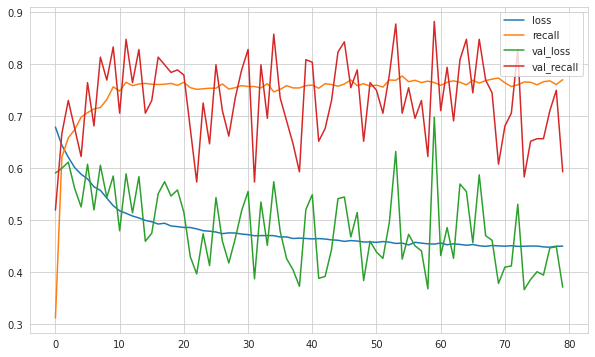

In [93]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [94]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3712345063686371
accuracy :  0.593137264251709


In [95]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[716  80]
 [ 83 121]]
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       796
         1.0       0.60      0.59      0.60       204

    accuracy                           0.84      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.84      0.84      0.84      1000



In [96]:
model.save('model_bankingchurn.h5')

## Prediction

In [98]:
from tensorflow.keras.models import load_model

In [99]:
model_bankingchurn = load_model('model_bankingchurn.h5')
scaler_bankingchurn = pickle.load(open("model_bankingchurn", "rb"))

In [100]:
single_customer = transformed_df.drop('Exited', axis = 1).iloc[0:1, :]
single_customer

,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.000,0.000,0.000,1.000,0.000,619.000,42.000,2.000,0.000,1.000,1.000,1.000,101348.880


In [101]:
single_customer = scaler_bankingchurn.transform(single_customer) # Scale imizi transform yapıyoruz yoksa sonuçlarımız yanlış gelir
single_customer

array([[1.        , 0.        , 0.        , 1.        , 0.        ,
        0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489]])

In [102]:
(model_bankingchurn.predict(single_customer) > 0.5).astype("int32")

array([[1]], dtype=int32)

In [103]:
df["Exited"].iloc[0]

1